# GPT 2018

* First, we use a language modeling objective on
the unlabeled data to learn the initial parameters of a neural network model. Subsequently, we adapt
these parameters to a target task using the corresponding supervised objective.

* Added an auxiliary language modeling
objective to target task objective gains on sequence labeling
tasks. Our experiments also use an auxiliary objective, but as we show, unsupervised pre-training
already learns several linguistic aspects relevant to target tasks.

* Pre-training stage
  Loss for 1st stage: L1

  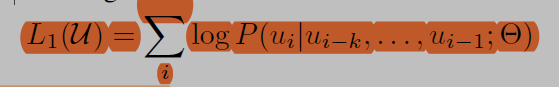

 where `k` is the size of the context window, with parameters Θ

* Supervised-pretraining
  Loss for 2nd stage: L2

  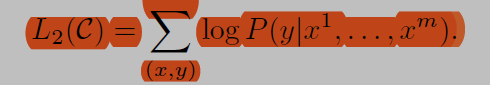

* We additionally found that including language modeling as an auxiliary objective to the fine-tuning
helped learning by
 * (a) improving generalization of the supervised model
 * (b) accelerating convergence.

* Loss for the training: L3

  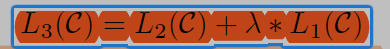

* Overall, the only extra parameters we require during fine-tuning areWy, and embeddings for delimiter
tokens

*

  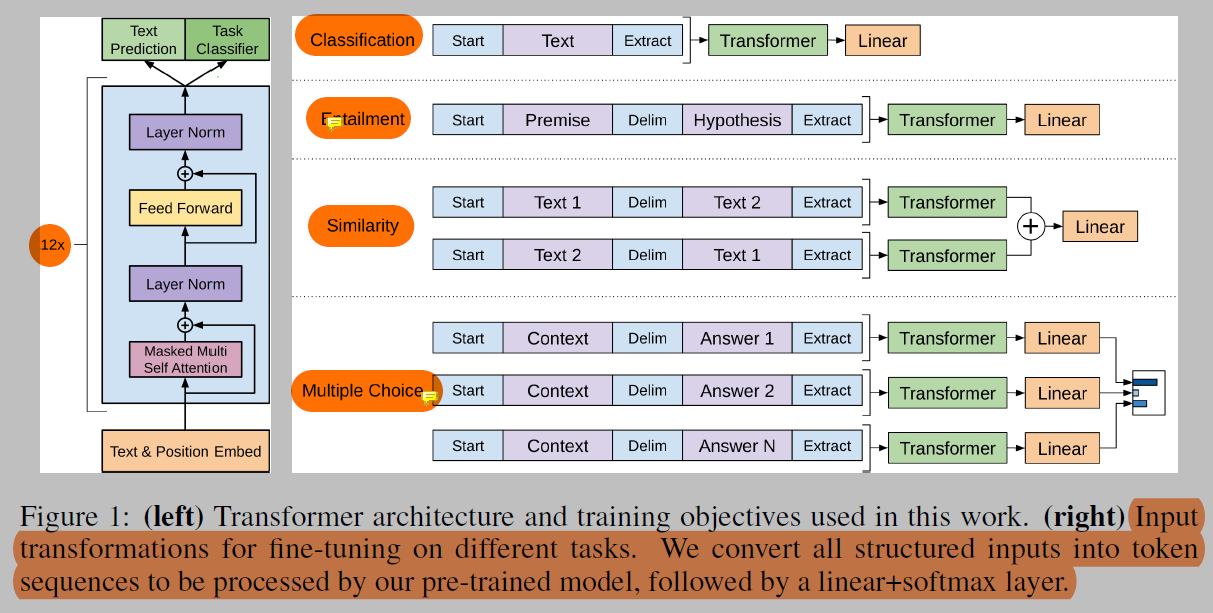

* For some tasks, like text classification, we can directly fine-tune our model as described above.
Certain other tasks, like question answering or textual entailment, have structured inputs such as
ordered sentence pairs, or triplets of document, question, and answers. Since our pre-trained model
was trained on contiguous sequences of text, we require some modifications to apply it to these tasks.

* We use a traversal-style
approach, where we convert structured inputs into an ordered sequence that our pre-trained
model can process. These input transformations allow us to avoid making extensive changes to the
architecture across tasks.

* Textual entailment: For entailment tasks, we concatenate the premise p and hypothesis h token
sequences, with a delimiter token ($) in between

* Similarity: To reflect this, we modify the input sequence to contain both possible sentence orderings (with a
delimiter in between) and process each independently to produce two sequence representations hml
which are added element-wise before being fed into the linear output layer.

* Question Answering and Commonsense Reasoning For these tasks, we are given a context
document z, a question q, and a set of possible answers fakg. We concatenate the document context
and question with each possible answer, adding a delimiter token in between to get [z; q; $; ak]. Each
of these sequences are processed independently with our model and then normalized via a softmax
layer to produce an output distribution over possible answers.

# Bidirectional Encoder Representations from Transformers (BERT) 2019

* BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers

* As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications.

* The major limitation is that standard language models are unidirectional, and this limits the choice of architectures that can be used during pre-training

* Such restrictions are sub-optimal for sentence-level tasks, and could be very harmful when applying finetuning based approaches to token-level tasks such as question answering, where it is crucial to incorporate context from both directions.

* We recognize that it would also be possible to train separate LTR and RTL models and represent each token as the concatenation of the two models,
as ELMo does. However: (a) this is twice as expensive as a single bidirectional model; (b) this is non-intuitive for tasks like QA, since the RTL model would not be able to condition the answer on the question; (c) this it is strictly less powerful than a deep bidirectional model, since it can use both left and right context at every layer

* The masked language model randomly masks some of the tokens from the input, and the objective is to predict the original vocabulary id of the masked word based only on its context

* Overall pre-training and fine-tuning procedures for BERT. Apart from output layers, the same architectures
are used in both pre-training and fine-tuning. The same pre-trained model parameters are used to initialize
models for different down-stream tasks. During fine-tuning, all parameters are fine-tuned. [CLS] is a special
symbol added in front of every input example, and [SEP] is a special separator token (e.g. separating questions/
answers)
<img src="https://production-media.paperswithcode.com/methods/new_BERT_Overall.jpg">

* ### Pretraining BERT
  * We pre-train BERT using two unsupervised
tasks
  1. Task 1: Masked LM (MLM)
    * Intuitively, it is reasonable
to believe that a deep bidirectional model is
strictly more powerful than either a left-to-right
model or the shallow concatenation of a left-toright
and a right-to-left model
    * Since bidirectional
conditioning would allow each word to indirectly
“see itself”, and the model could trivially
predict the target word in a multi-layered context
    * In order to train a deep bidirectional representation,
we simply mask some percentage of the input
tokens at random, and then predict those masked
tokens
    * The final hidden vectors corresponding to the
mask tokens are fed into an output softmax over
the vocabulary, as in a standard LM. **They mask 15% of the tokens at random**
    * We only predict the masked words rather than reconstructing the entire input.
    * Although this allows us to obtain a bidirectional
pre-trained model, a downside is that we
are creating a mismatch between pre-training and
fine-tuning, since the `[MASK]` token does not appear
during fine-tuning. To mitigate this, we do
not always replace “masked” words with the actual
`[MASK]` token. If the i-th token is chosen, we replace
the i-th token with
      1. the `[MASK]` token 80% of
the time
      2. A random token 10% of the time
      3. The unchanged i-th token 10% of the time. Then,
`T_i` will be used to predict the original token with
cross entropy loss
  2. Task 2: Next Sentence Prediction (NSP)
    * Many important downstream tasks such as Question
Answering (QA) and Natural Language Inference
(NLI) are based on understanding the relationship
between two sentences, which is not directly
captured by language modeling
    * In order to train a model that understands sentence relationships,
we pre-train for a binarized next sentence prediction task that can be trivially generated from any monolingual corpus
    * Specifically, when choosing the sentences A and B for each pretraining
example, 50% of the time B is the actual next sentence that follows A (labeled as IsNext), and 50% of the time it is a random sentence from the corpus (labeled as NotNext)

  * BERT input representation. The input embeddings are the sum of the token embeddings, the segmentation
embeddings and the position embeddings
  <img src="https://miro.medium.com/v2/resize:fit:1321/0*m_kXt3uqZH9e7H4w.png">
  * It is critical to use a document-level corpus rather than a shuffled sentence-level corpus

* ### Fine-tuning BERT
  * For applications involving text pairs, a common
pattern is to independently encode text pairs before
applying bidirectional cross attention
  * BERT uses the self-attention mechanism to unify
these two stages, as encoding a concatenated text
pair with self-attention effectively includes bidirectional
cross attention between two sentences
  * At the input, sentence A and sentence B from pre-training
are analogous to
    1. sentence pairs in paraphrasing,
    2. hypothesis-premise pairs in entailment,
    3. question - passage/context(from which answer is based on) pairs in question answering, and
    4. a degenerate text-Φ pair in text classification
or sequence tagging
  * #### Question-Answering
    * In practice, during training, the model is typically presented with the question and a portion of the context or passage from which the answer should be derived. The model is then trained to predict the correct answer based on this partial context. This setup ensures that the model learns to understand the relationship between the question and the relevant information in the context, without directly accessing the exact answer.
    * During inference or testing, the model is given the question and the complete context or passage, and it generates the answer based on its learned understanding of the task. This ensures that the model is evaluated on its ability to generate answers in a more realistic scenario where it has not seen the exact answers beforehand. **In case of chatbots, like CHATGPT it uses it's pretrained knowledge as context to answer**
    * In the question answering task, we represent the input question and passage as a single packed sequence, with the question using the `A` embedding and the passage using the `B` embedding
    * We only introduce a start vector `S ∈ R^H` and an end vector `E ∈ R^H` during fine-tuning.
    * The probability of word i being the start of the answer span is computed as a dot product between `T_i` and `S` followed by a softmax over all of the words in the paragraph: `p_i = exp(S*T_i)/sum(dot(S, T))`
    * The analogous formula is used for the end of the answer span. The score of a candidate span from position `i` to position `j` is defined as `S.T_i + E.T_j` , and the maximum scoring span where `j >= i` is used as a prediction. The training objective is the sum of the log-likelihoods of the correct start and end positions

* Effect of Model Size: Peters et al. (2018b) presented mixed results on the downstream task impact of increasing the pre-trained bi-LM size from two to four layers and Melamud et al. (2016) mentioned in passing that increasing hidden dimension size from 200 to 600 helped, but increasing further to 1,000 did not bring further improvements

* ### Feature-based tuning BERT
  * Feature-based approach, where fixed features are extracted from the pretrained model, has certain advantages
  * We apply the feature-based approach by extracting the activations from one or more layers without fine-tuning any parameters of BERT
  * The best performing method concatenates the token representations from the top four hidden layers of the pre-trained Transformer, which is only 0.3 F1 behind fine-tuning the entire model. This demonstrates that BERT is effective for both finetuning and feature-based approaches

# GPT-2 2019

* Demonstrates that language models begin to learn tasks without any explicit supervision when trained on a new dataset of millions of webpages called WebText
* When
conditioned on a document plus questions, the answers
generated by the language model reach 55
F1 on the CoQA dataset - matching or exceeding
the performance of 3 out of 4 baseline systems
without using the 127,000+ training examples
* The capacity of the language model is essential
to the success of zero-shot task transfer and increasing
it improves performance in a log-linear
fashion across tasks
* Current systems
are better characterized as narrow experts rather than competent generalists. We would like to move towards more
general systems which can perform many tasks – eventually
without the need to manually create and label a training
dataset for each one
* ### Pretraining on Language Modeling
    * Our approach motivates building as large and
  diverse a dataset as possible in order to collect natural language
  demonstrations of tasks in as varied of domains and
  contexts as possible
* ### Input representations
  * Current large scale LMs include pre-processing steps such as lowercasing,
  tokenization, and out-of-vocabulary tokens which
  restrict the space of model-able strings
  * Byte Pair Encoding (BPE) is a
  practical middle ground between character and word level
  language modeling which effectively interpolates between
  word level inputs for frequent symbol sequences and character
  level inputs for infrequent symbol sequences
  * Observed taht
  BPE including many versions of common words like dog
  since they occur in many variations such as dog. dog!
  dog?
  * This input representation allows us to combine the empirical
  benefits of word-level LMs with the generality of byte-level
  approaches. Since our approach can assign a probability to
  any Unicode string, this allows us to evaluate our LMs on
  any dataset regardless of pre-processing, tokenization, or
  vocab size.
* ### Model
  * OpenAI GPT model with a few modifications. Layer normalization was moved to the input of each sub-block, similar to a
  pre-activation residual network and an
  additional layer normalization was added after the final selfattention
  block
  * We scale the weights of residual layers at initialization
by a factor of `1/N**0.5` where `N` is the number of
residual layers
  * Vocabulary is expanded to 50,257, context size from 512 to 1024 tokens and batch_size of 512 is used
  * All models still underfit Web-
Text and held-out perplexity has as of yet improved given
more training time.
  * Since our model operates
on a byte level and does not require lossy pre-processing
or tokenization, we can evaluate it on any language model
benchmark

* The
previous state of the art (Hoang et al., 2018) used a different
restricted prediction setting where the outputs of the model
were constrained to only words that appeared in the context.
For GPT-2, this restriction is harmful rather than helpful
since 19% of answers are not in context. We use a version
of the dataset without preprocessing
* ### Generalization vs Memorization
  * Recent work in computer vision has shown that common image
  datasets contain a non-trivial amount of near-duplicate
  images. For instance CIFAR-10 has 3.3% overlap between
  train and test images (Barz & Denzler, 2019). This results in
  an over-reporting of the generalization performance of machine
  learning systems. As the size of datasets increases this
  issue becomes increasingly likely which suggests a similar
  phenomena could be happening with WebText. Therefore it
  is important to analyze how much test data also shows up in
  the training data.

# DistilBERT 2020

* Proposes a method to pre-train a smaller generalpurpose
language representation model, called DistilBERT, which can then be finetuned
with good performances on a wide range of tasks like its larger counterparts
* It's possible to reduce the size of a BERT model by 40%, while retaining 97%
of its language understanding capabilities and being 60% faster
* To leverage the
inductive biases learned by larger models during pre-training, we introduce a triple
loss combining language modeling, distillation and cosine-distance losses
* ### Knowledge distillation
  * It's a compression technique in which
  a compact model - the student - is trained to reproduce the behaviour of a larger model - the teacher -
  or an ensemble of models.
  * Training loss: The student is trained with a distillation loss over the soft-target-probabilities of the teacher: `L_ce =t_i*log(s_i)` where `t_i`is the probability estimated by the teacher and `s_i` is the probability by the student. This objective results in a rich training signal by leveraging the full teacher distribution instead of hard-targets.
  * The final training objective is a linear combination of the distillation loss `L_ce` with the supervised training loss, in our case the masked language modeling loss `L_mlm` (same loss as BERT) . We found it beneficial to add a cosine embedding loss `L_cos` which will tend to align the directions of the student and teacher hidden states vectors.

  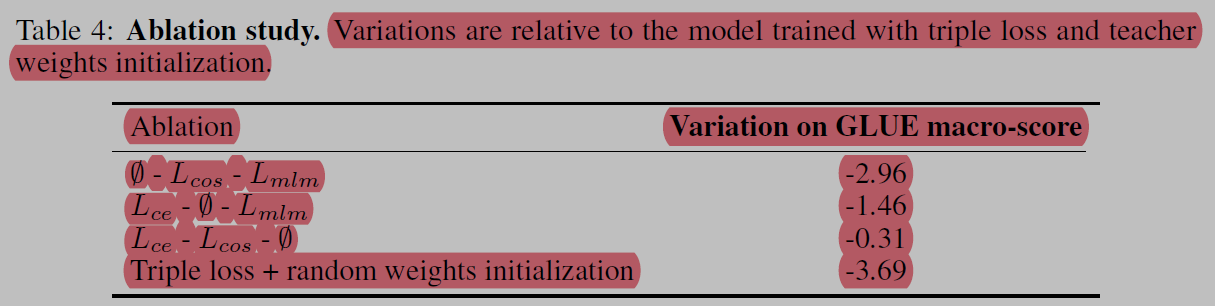

* Recent developments
in weights pruning reveal that it is possible to remove some heads in the self-attention at test time
without significantly degrading the performance

# T5 2020

* In this paper, we explore the landscape of transferlearning techniques for NLP by introducing a unified framework that converts all text-based language problems into a text-to-text format
* The basic idea underlying our work is to treat every text processing problem as a “text-to-text” problem, i.e. taking text as input and producing new text as output
* This approach is inspired by previous unifying frameworks for NLP tasks, including casting all text problems as question answering (McCann et al., 2018), language modeling (Radford et al., 2019), or span extraction Keskar et al. (2019b) tasks
* Crucially, the text-to-text framework allows us to directly apply the same model, objective, training procedure, and decoding process to every task we consider
* Every task we consider—including translation, question answering, and classification—is cast as feeding our model text as input and training it to generate some target text. This allows us to use the same model, loss function, hyperparameters, etc. across our diverse set of tasks
  <img src="https://production-media.paperswithcode.com/methods/new_text_to_text.jpg">

* ### Model
 * First, an input sequence of tokens is mapped to a sequence of embeddings, which is then passed into the encoder. The encoder consists of a stack of “blocks”, each of which comprises two subcomponents: a self-attention layer
followed by a small feed-forward network.

  * Layer normalization (Ba et al., 2016) is applied to the input of each component.We use a simplified version of layer normalization where the activations are only rescaled and no additive bias is applied. After layer normalization, a residual skip connection (He et al., 2016) adds each subcomponent’s input to its output.
  * Dropout (Srivastava et al., 2014) is applied within the feed-forward network, on the skip connection, on the attention weights, and at the input and output of the entire stack
  * The self-attention mechanism in the decoder also uses a form of autoregressive or causal selfattention, which only allows the model to attend to past outputs. The output of the final decoder block is fed into a dense layer with a softmax output, whose weights are shared with the input embedding matrix
  * Now more common to use relative position embeddings
* ### Input-Output Format
  * In order to train a single model on the diverse set of tasks described  above, we cast all of the tasks we consider into a “text-to-text” format—that is, a task where the model is fed some text for context or conditioning and is then asked to produce some output text
  * The model is trained with a maximum likelihood objective (using “teacher forcing” (Williams and Zipser, 1989)) regardless of the task
  * To specify which task the model should perform, we add a task-specific (text) prefix to the original input sequence before feeding it to the model.
  * Translation
    * To ask the model to translate the sentence "That is good." from English to German, the model would be fed the sequence `“translate English to German: That is good.”` and would be trained to output `“Das ist gut.”`
  * CLassification
    * With our preprocessing, the input sequence becomes `“mnli premise: I hate pigeons. hypothesis: My feelings towards pigeons are filled with  animosity.”` with the corresponding target word `“entailment”`
  * Summarization is done by feeding in a document followed by the text `“TL;DR:” (short for “too long, didn’t read”, a common abbreviation)` and then the `summary is predicted via autoregressive decoding`

### Unsupervised Pretraining Objective
* Than “Denoising” objective (Devlin et al., 2018; Taylor, 1953) (also called “masked language modeling”) produces better performance and as a result they have quickly become standard. In a denoising objective, the model is trained to predict missing or otherwise corrupted tokens in the input

  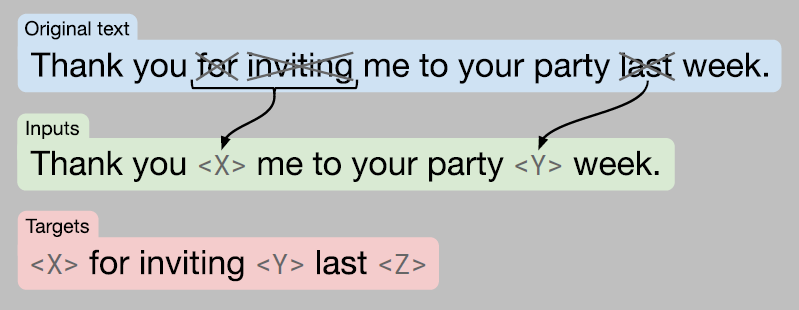

  Unsurprisingly, we find that pre-training provides significant gains across
almost all benchmarks

* ### Different Attention for different models

  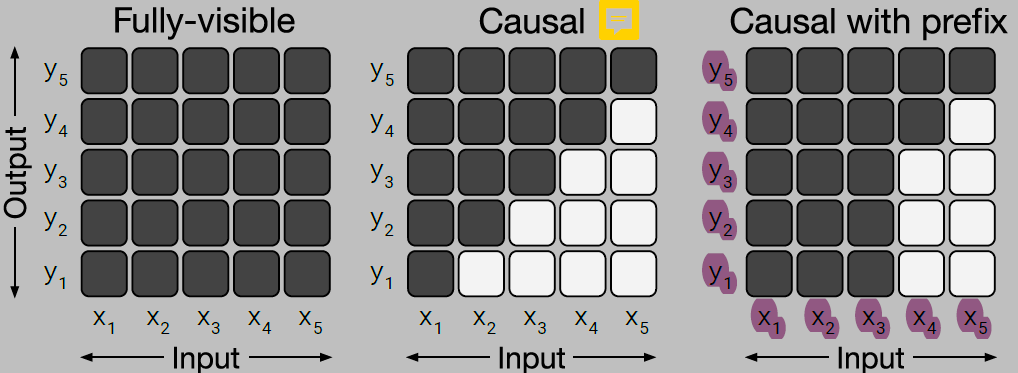

  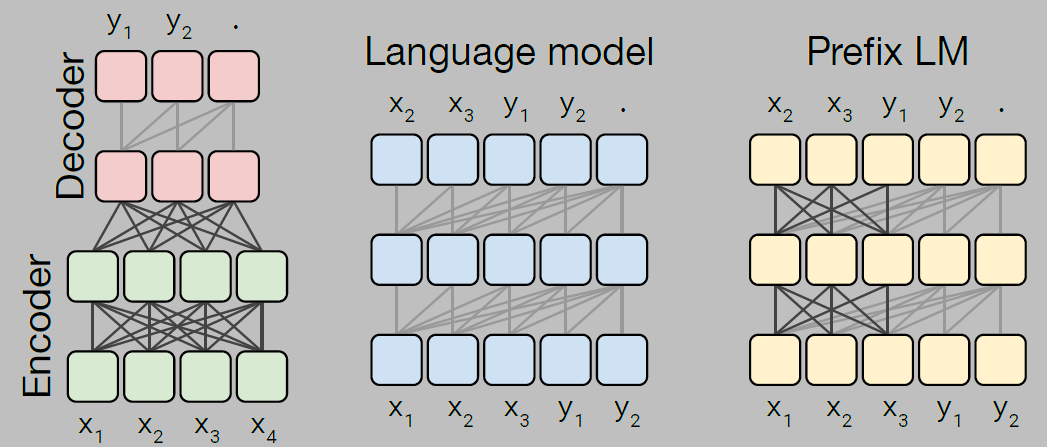

 ## Comparisons
    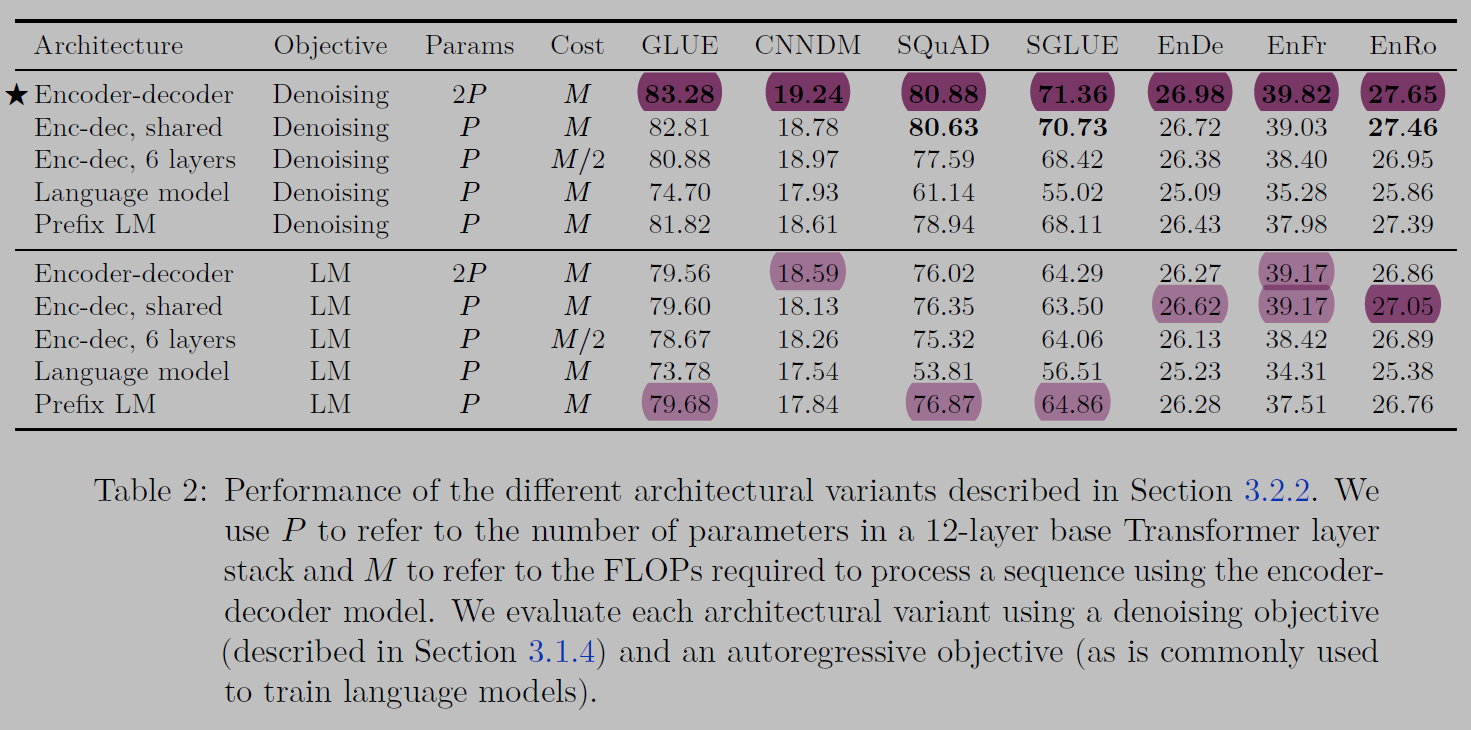

    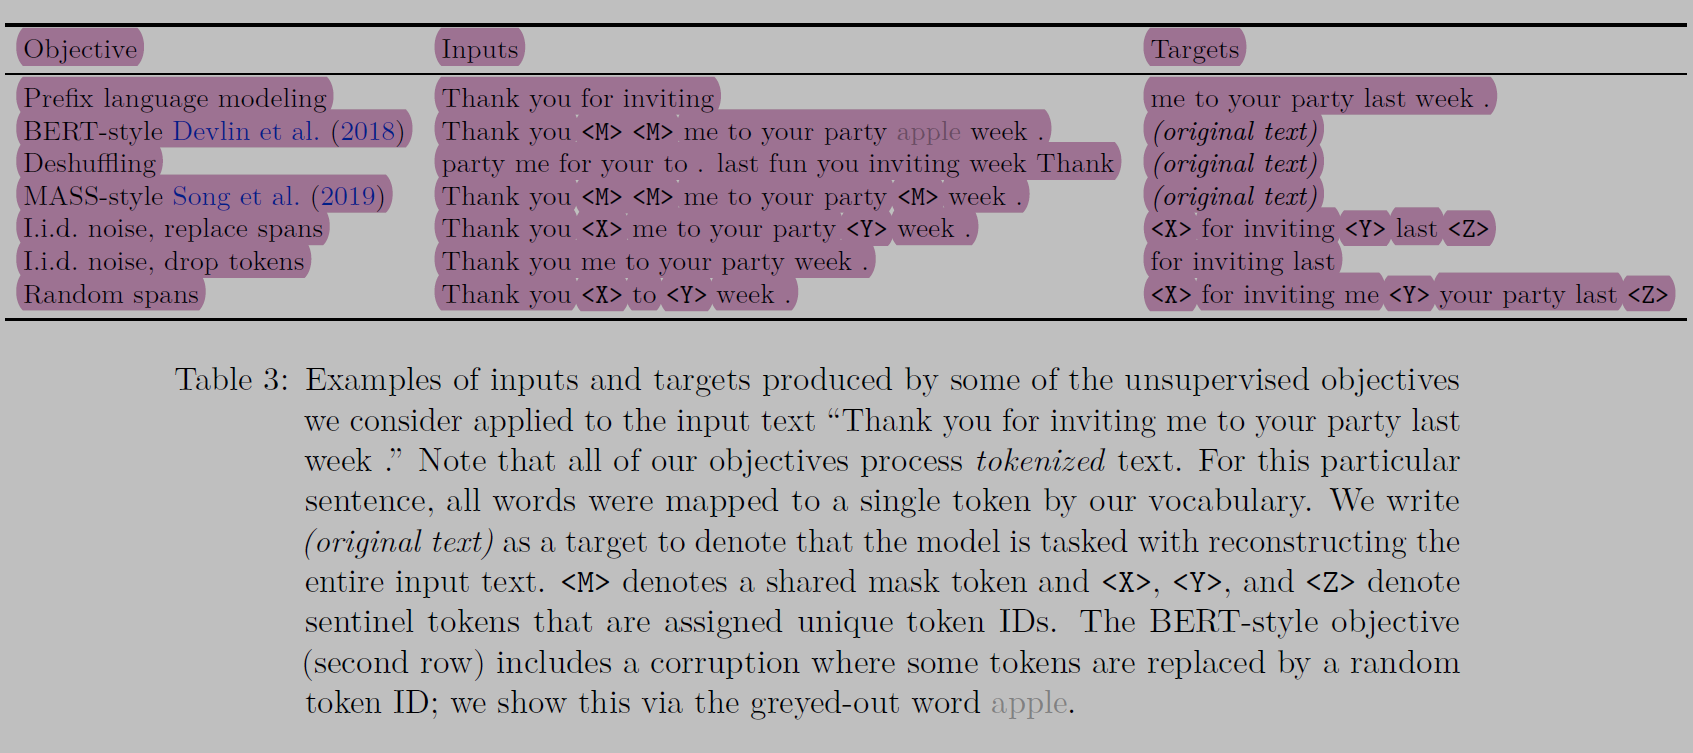

    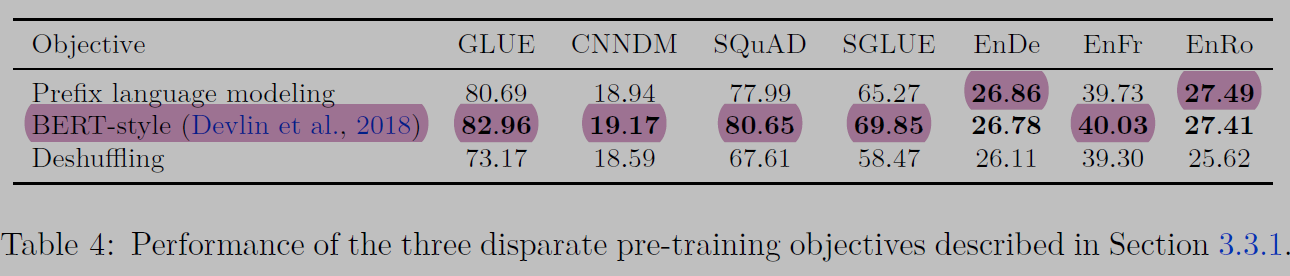

    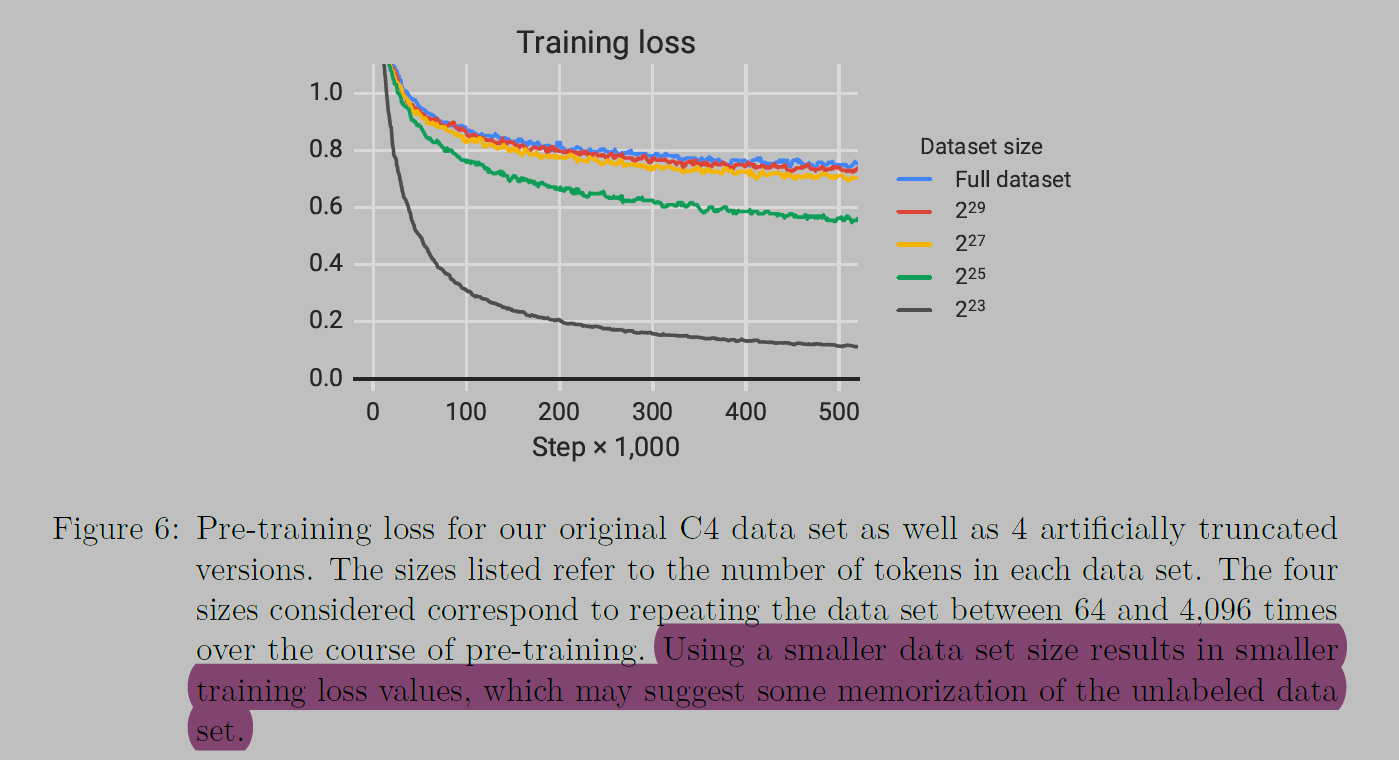

    * Keeping most of the original model fixed while fine-tuning. Adapter layers are additional dense-ReLU-dense blocks that are added after each of the preexisting feed-forward networks in each block of the Transformer
    
    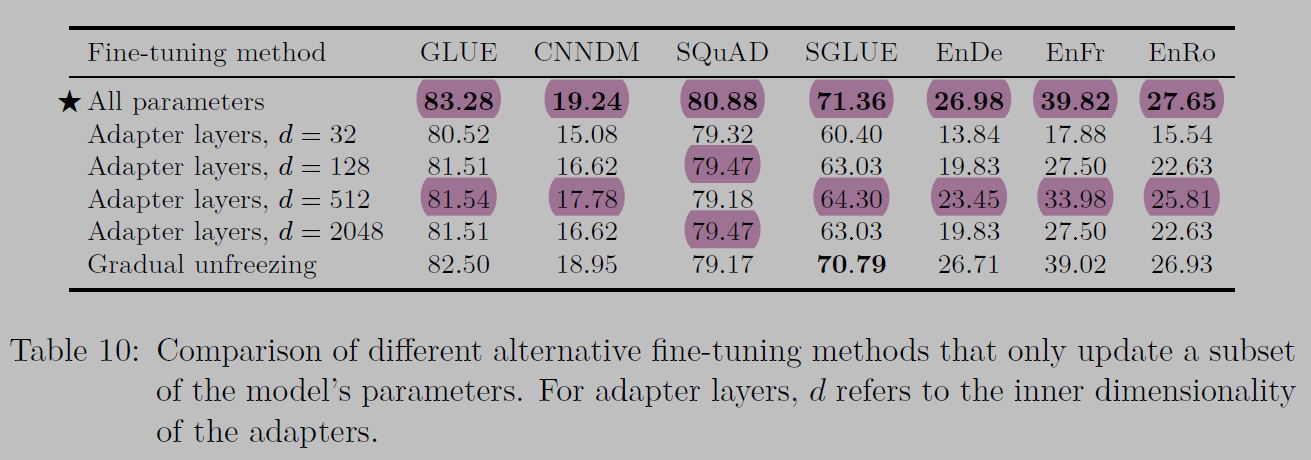

### Multitask Learning
* “Multitask learning”, is to train the model on multiple tasks at a time. This approach typically has the goal of training a single model that can simultaneously perform many tasks at once, i.e. the model and most of its parameters are shared across all tasks
* An extremely important factor in multi-task learning is how much data from each task the model should be trained on
* Proportion of data coming from each task can depend on various factors including data set sizes, the “difficulty” of learning the task
* An additional issue is the potential for “task interference” or “negative transfer”, where achieving good performance on one task can hinder performance on another
    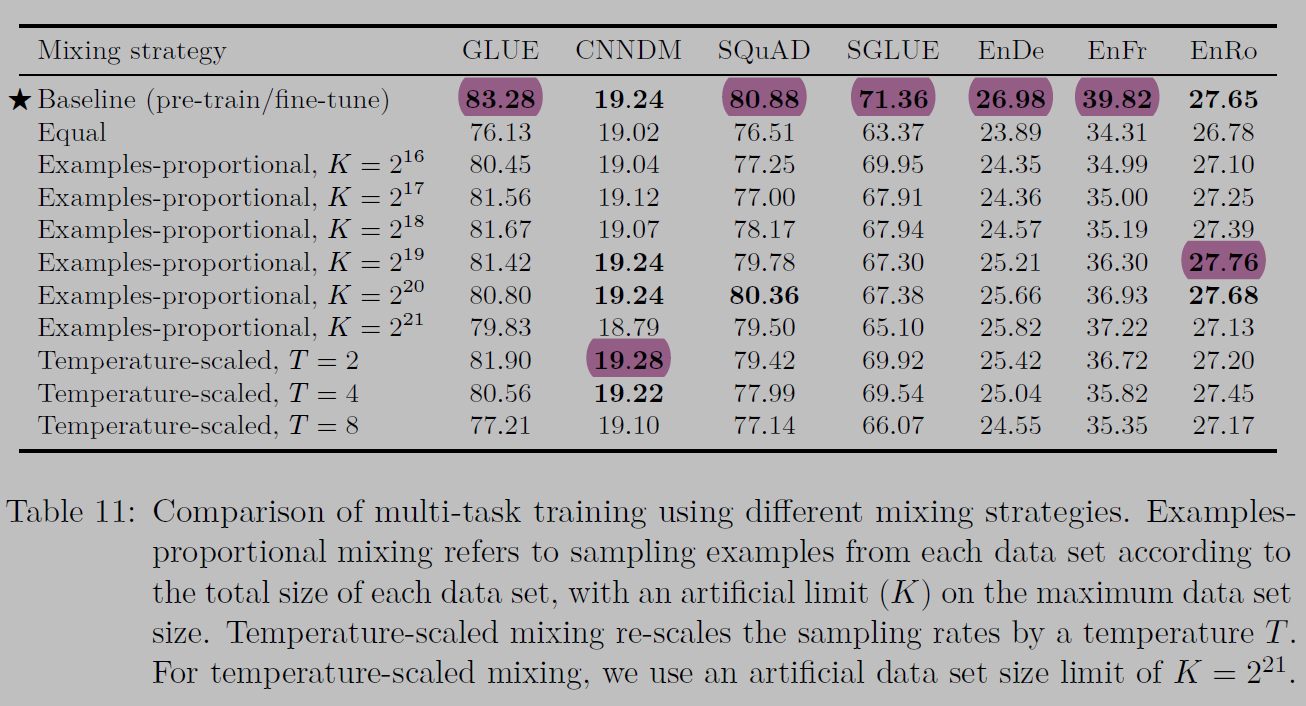

# Scaling

 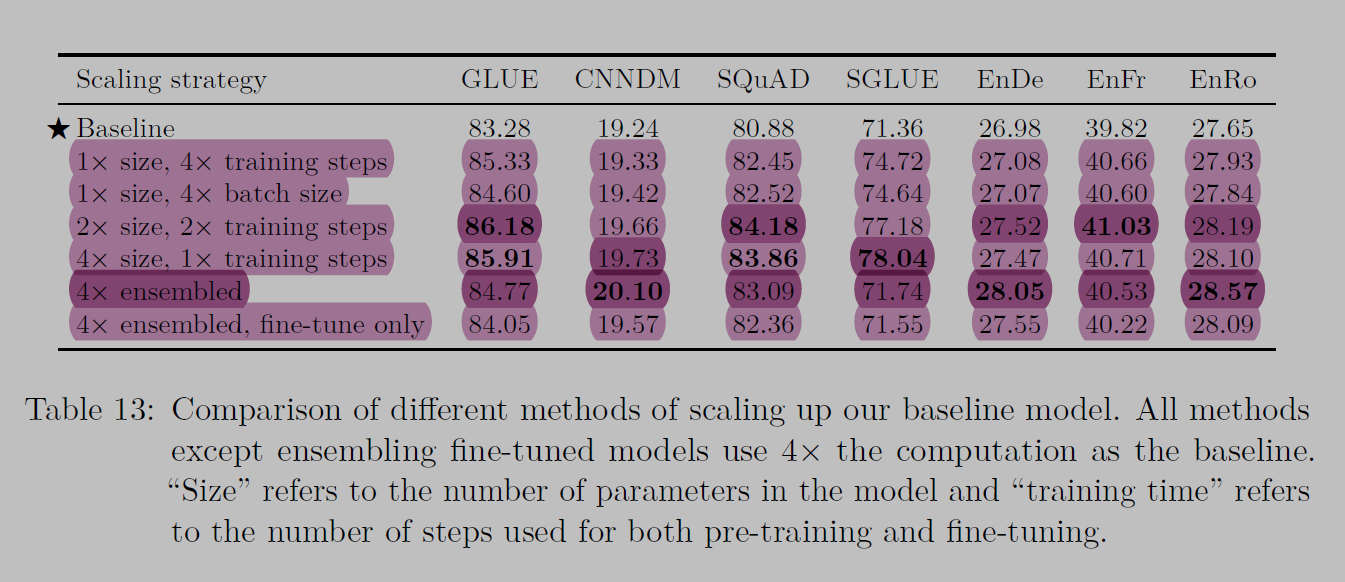    

## Puting it all together
* We now leverage the insights from our systematic study to determine how far we can push performance on popular NLP benchmarks. We are also interested in exploring the current limits of transfer learning for NLP by training larger models on large amounts of data. We
start with our baseline training approach and make the following changes:

* Objective: We swap out the i.i.d. denoising objective in our baseline for the span-corruption objective described in Section 3.3.4, which was loosely inspired by SpanBERT (Joshi et al., 2019). Specifically, we use a mean span length of 3 and corrupt 15% of the original sequence. We found that this objective produced marginally better performance (Table 7) while being slightly more computationally efficient due to shorter target sequence lengths.

* Longer training: Our baseline model uses a relatively small amount of pre-training (1⁄4 as much as BERT (Devlin et al., 2018), 1⁄16 as much as XLNet (Yang et al., 2019), 1⁄64 as much as RoBERTa (Liu et al., 2019c), etc.). Fortunately, C4 is big enough that we can train for substantially longer without repeating data (which can be detrimental, as shown in Section 3.4.2). We found in Section 3.6 that additional pre-training can indeed be helpful, and that both increasing the batch size and increasing the number of training steps can confer this benefit. We therefore pre-train our models for 1 million steps on a batch size of 211 sequences of length 512, corresponding to a total of about 1 trillion pre-training tokens (about 32× as many as our baseline). In Section 3.4.1, we showed that pre-training on the RealNews-like, WebText-like, and Wikipedia + TBC data sets outperformed pre-training on C4 on a few downstream tasks. However, these data set variants are sufficiently small that they would be repeated hundreds of times over the course of pre-training on 1 trillion tokens. Since we showed in Section 3.4.2 that this repetition could be harmful, we opted instead to continue using the C4 data set.
* Model sizes: In Section 3.6 we also showed how scaling up the baseline model size improved performance. However, using smaller models can be helpful in settings where limited computational resources are available for fine-tuning or inference. Based on these factors, we train models with a wide range of sizes:
 * Base. This is our baseline model, whose hyperparameters are described in
Section 3.1.1. It has roughly 220 million parameters.
 * Small. We consider a smaller model, which scales the baseline down by using
dmodel = 512, dff = 2,048, 8-headed attention, and only 6 layers each in the
encoder and decoder. This variant has about 60 million parameters.
 * Large. Since our baseline uses a BERTBASE-sized encoder and decoder, we
also consider a variant where the encoder and decoder are both similar in size
and structure to BERTLARGE. Specifically, this variant uses dmodel = 1,024,
dff = 4,096, dkv = 64, 16-headed attention, and 24 layers each in the encoder and decoder, resulting in around 770 million parameters.
 * 3B and 11B. To further explore what kind of performance is possible when
using larger models, we consider two additional variants. In both cases, we use
dmodel = 1024, a 24 layer encoder and decoder, and dkv = 128. For the “3B”
variant, we use dff = 16,384 with 32-headed attention, which results in around 2.8 billion parameters, for “11B” we use dff = 65,536 with 128-headed attention
producing a model with about 11 billion parameters. We chose to scale up dff
specifically because modern accelerators (such as the TPUs we train our models
on) are most efficient for large dense matrix multiplications like those in the
Transformer’s feed-forward networks.

* Multi-task pre-training In Section 3.5.3, we showed that pre-training on a multi-task mixture of unsupervised and supervised tasks before fine-tuning worked as well as pre-training on the unsupervised task alone. This is the approach advocated by the “MT-DNN” (Liu et al., 2015, 2019b). It also has the practical benefit of being able to monitor “downstream” performance for the entire duration of training, rather than just during fine-tuning. We therefore used multi-task pre-training in our final set of experiments. We hypothesize that larger models trained for longer might benefit from a larger proportion of unlabeled data because they are more likely to overfit to smaller training data sets. However, we also note that the results of Section 3.5.3 suggest that
fine-tuning after multi-task pre-training can mitigate some of the issues that might arise from choosing a suboptimal proportion of unlabeled data. Based on these ideas, we substitute the following artificial data set sizes for our unlabeled data before using standard example-proportional mixing (described in Section 3.5.2): 710,000 for Small, 2,620,000 for Base, 8,660,000 for Large, 33,500,000 for 3B, and 133,000,000 for 11B. For all model variants, we also capped the effective data set size of the WMT English to French and WMT English to German data sets to 1M examples during pre-training.

* Beam search All of our previous results were reported using greedy decoding. For tasks
with long output sequences, we found improved performance from using beam search
(Sutskever et al., 2014). Specifically, we use a beam width of 4 and a length penalty
of
 = 0.6 (Wu et al., 2016) for the WMT translation and CNN/DM summarization
tasks.

# GPT-3 2020

* We use the same model and architecture as GPT-2, including the modified initialization, pre-normalization, and reversible tokenization described therein, with the exception that we use alternating dense and locally banded sparse attention patterns in the layers of the transformer, similar to the Sparse Transformer
* dff_in = 4*d_model
* context_window = 2048 tokens
* As found in [KMH+20, MKAT18], larger models can typically use a larger batch size, but require a smaller learning rate. We measure the gradient noise scale during training and use it to guide our choice of batch size
* To train the larger models without running out of memory, we use a mixture
of model parallelism within each matrix multiply and model parallelism across the layers of the **network**

# PALM-1 2022
* Many of the models, such as BERT (Devlin et al., 2019) and T5 (Raffel et al., 2020), are trained with encoder-only or encoder-decoder architectures using an infilling (\masked LM" or \span corruption") pre-training objective on a large corpus of text, and are typically then adapted to one or more specific tasks through finetuning
* Although these models have achieved near universal state of the art across thousands of natural language tasks, the downside is that they require a significant number of task-specific training examples to finetune the model
* Additionally, at least a portion of the model parameters must be updated to fit the task, adding complexity from model finetuning and deployment

## Key takeaways
* Efficient Scaling: We demonstrate the first large-scale use of Pathways (Barham et al., 2022) - a new ML system which enables training a single model across thousands or tens of thousands of accelerator chips in a highly efficient manner
* Scaling the model: scaling improvements from large LMs have **neither** plateaued **nor** reached their saturation point
* Multi-Query Attention: The standard Transformer formulation uses k attention heads, where the input vector for each timestep is linearly projected into \query", \key", and \value" tensors of shape [k; h], where h is the attention head size. Here, the key/value projections are shared for each head, i.e.
\key" and \value" are projected to [1; h], but \query" is still projected to shape [k; h]
* We use RoPE embeddings
* Shared Input-Output Embeddings: We share the input and output embedding matrices, which is done frequently (but not universally) in past work
* No Biases: No biases were used in any of the dense kernels or layer norms. We found this to result in increased training stability for large models
* Vocab: SentencePiece, vocabulary with 256k tokens. Out-of-vocabulary Unicode characters are split into UTF-8 bytes, with a vocabulary token for each byte. Numbers are always split into individual digit tokens (e.g., \123.5 ! 1 2 3 . 5").

## Architectural changes
* We use SwiGLU activation in FeedForward Layers (2 weight matrices)
* We Parallel Formulation in each Transformer Block, rather than the standard form.
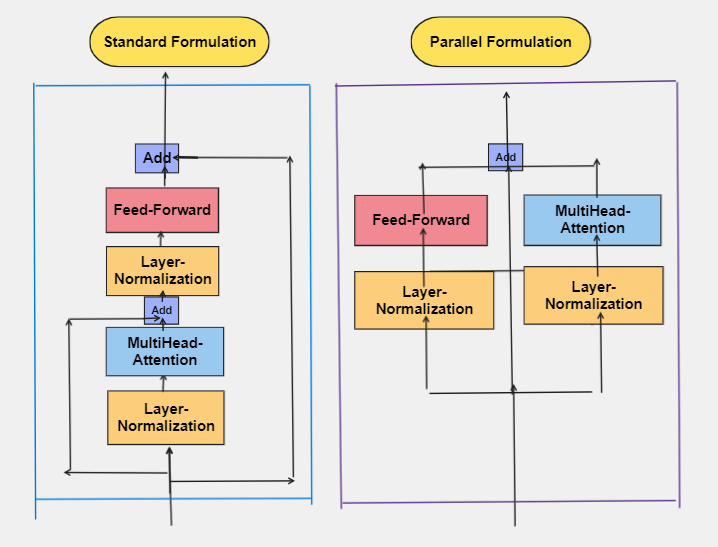

 The parallel formulation results in roughly 15% faster training speed at large scales, since the MLP and Attention input matrix multiplications can be fused.

  Ablation experiments showed a small quality degradation at 8B scale but no quality degradation at 62B scale, so we extrapolated that the effect of parallel layers should be quality neutral at the 540B scale.

### Model Scale Hyperparameters
* Hyperparameters for 3 PaLM models
 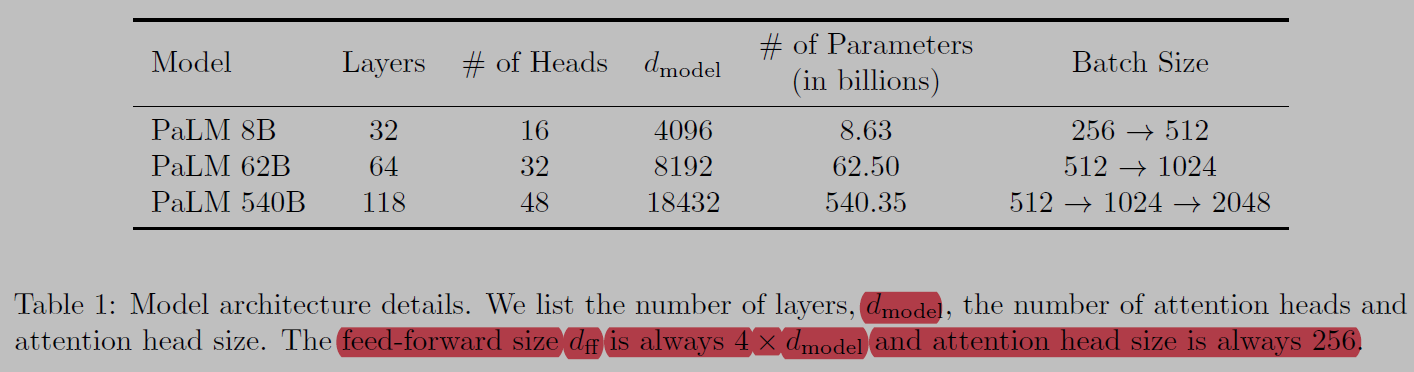

* In order to efficiently compute the backwards pass of most neural network architectures using gradient descent, many intermediate activations for the batch must be stored in memory. If they cannot all fit, some forward pass operations can be re-computed (enabling some activations to be rematerialized rather than stored)
* Weight initialization: The kernel weights (i.e., everything but the embeddings and layer norm scales) are initialized with \fan-in variance scaling", i.e., W ~ N(0; 1/sqrt(n_in)), where nin is the input dimension of the kernel. The input embeddings are initialized to E ~ N(0, 1)
* Optimizer: Adafactor optimizer (Shazeer & Stern, 2018), without
factorization. This is effectively equivalent to Adam (Kingma & Ba, 2014) with \parameter scaling," which scales the learning rate by the root-mean-square of the parameter matrix. Because the weight initialization is proportional to 1/
sqrt(n), the effect of this is similar to the manual scaling down of Adam
learning rate as in Brown et al. (2020). However, parameter scaling has the beneffit that parameter matrices which operate at different scales (the embeddings and layer norm scales) do not have their learning rate scaled down at the same rate
* Optimization hyperparameters: Adafactor learning rate of 10􀀀2 for the first 10,000 steps, which is then decayed at a rate of 1/sqrt(k), where k is the step number. `beta1=0.9`, `beta2=1-k^-0.8`
* Loss: additional loss, z_loss = 10^-4 log^2 Z to encourage the softmax normalizer log(Z) to be close to 0, which we found
increases the stability of training
* Sequence length: A sequence length of 2048 was used for all models. Input examples are concatenated together and then split into sequences of exactly 2048 tokens, so that there are no padding tokens
* Batch size: For all models, **we increase the batch size during training. For the largest model, we use batch size 512 (1M tokens) until step 50k, then double it to 1024 (2M tokens) until step 115k, and finally double again it to 2048 (4M tokens) until training is complete at step 255k**. The smaller models
followed similar schedules. The reason for using such batch size schedule is twofold: (1) smaller batch sizes are more sample eficient (i.e., better loss as a function of tokens seen) earlier in training, **while larger batch sizes are benefficial later in training due to better gradient estimates (Smith et al., 2018; McCandlish et al., 2018), and (2) larger batch sizes result in larger matrix multiplication dimensions, which increases TPU efficiency.**
* Dropout: The model was trained without dropout, although dropout of 0.1 is used for finetuning in most cases.

### Training Instability
* For the largest model, we observed spikes in the loss roughly 20 times during training, despite the fact that gradient clipping was enabled. These spikes occurred at highly irregular intervals, sometimes happening late into training, and were not observed when training the smaller models
* Spikes only occur due to the combination of specific data batches with a particular model parameter state

### Chain of thought prompting
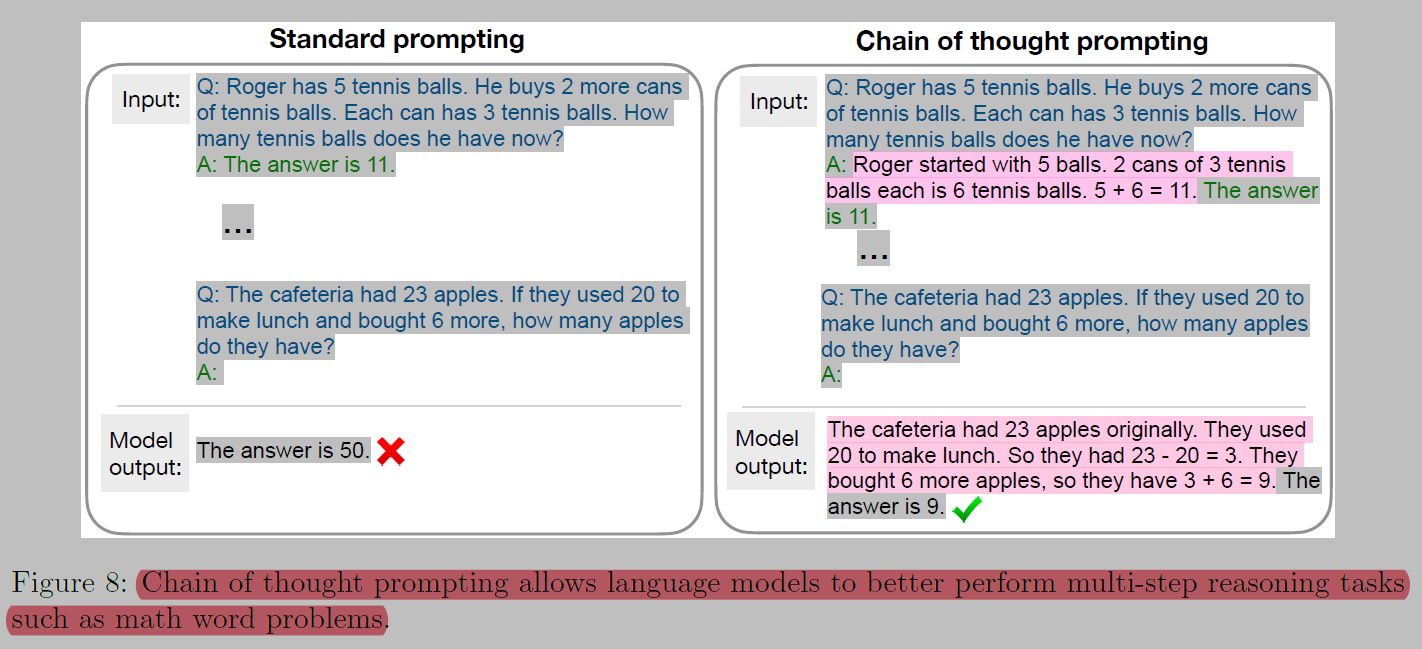

# LLaMA-1/2

* 7B to 65B parameters. We train our models on trillions of tokens, and show that it is possible to train state-of-the-art models using publicly available
datasets exclusively, without resorting to proprietary and inaccessible datasets
* Recent work from Hoffmann et al. (2022) shows that, for a given compute budget, the best performances are not achieved by the largest models,
but by smaller models trained on more data
* Given a target level of performance, the preferred model is not the fastest to train but the fastest at inference, and although it may be cheaper to train a large model to reach a certain level of performance, a smaller one trained longer will ultimately be cheaper at inference
* LLaMA-13B outperforms GPT-3 on most benchmarks, despite being 10x smaller
* Unlike Chinchilla, PaLM, or GPT-3, we only use publicly available data, making our work compatible with open-sourcing, while most existing
models rely on data which is either not publicly available or undocumented

## Tokenizer
* We tokenize the data with the bytepair encoding (BPE) algorithm (Sennrich et al., 2015), using the implementation from Sentence-Piece (Kudo and Richardson, 2018). Notably, we split all numbers into individual digits, and fallback
to bytes to decompose unknown UTF-8 characters.

## Architecture
* Transformer Architecture Obviously!
* Pre-normalization [GPT3]. **To improve the training stability, we normalize the input of each transformer sub-layer**, instead of normalizing the
output. We use the **RMSNorm normalizing function**, introduced by Zhang and Sennrich (2019)
* SwiGLU activation function [PaLM]. We replace the ReLU non-linearity by the SwiGLU activation function, introduced by Shazeer (2020) to improve the performance. We use a dimension of `(2/3)*4d` instead of `4d` as in PaLM
* Rotary Embeddings [GPTNeo]. We remove the absolute positional embeddings, and instead, add rotary positional embeddings (RoPE), introduced by Su et al. (2021), at each layer of the network

## Optimizer
* `AdamW` optimizer (Loshchilov and Hutter, 2017), with the following
hyper-parameters: `β1 = 0.9`; `β2 = 0.95`
* Cosine learning rate schedule, such that the final learning rate is equal to 10% of the maximal learning rate **[*LLaMA2: We use a cosine learning rate schedule, with warmup of 2000 steps, and decay
final learning rate down to 10% of the peak learning rate*]**
* Weight decay of `0.1` and gradient clipping of `1.0`

## Efficient Implementation
* First, we use an efficient implementation of the causal multi-head attention
to reduce memory usage and runtime. This implementation, available in the `xformers` library
* This is achieved by not storing the attention weights and not computing
the key/query scores that are masked due to the causal nature of the language modeling task
* We reduced the amount of activations that are recomputed during the backward pass with checkpointing
* We save the activations that
are expensive to compute, such as the outputs of
linear layers.
* This is achieved by **manually implementing the backward function for the transformer layers, instead of relying on the PyTorch autograd** 😰😰😰

* ## RMSNorm
 * A well-known explanation of the success of LayerNorm is its re-centering and re-scaling invariance property
 * In this paper, we hypothesize that the re-scaling invariance is the reason for success of LayerNorm, rather than re-centering invariance
 * RMSNorm simplifies LayerNorm by totally removing the mean statistic at the cost of sacrificing the invariance that mean normalization affords
 * RMSNorm Equations

    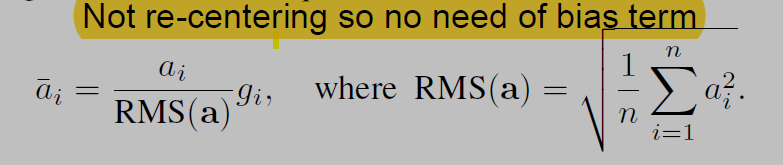
    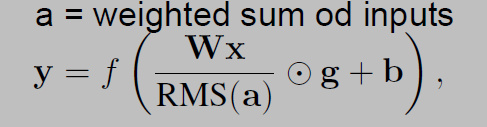

* ## Rotary Positional Embedding
    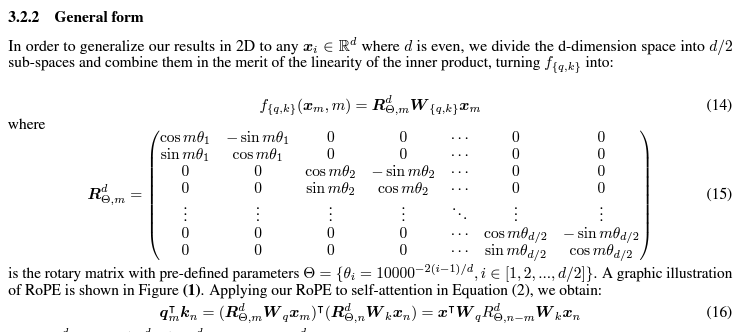

    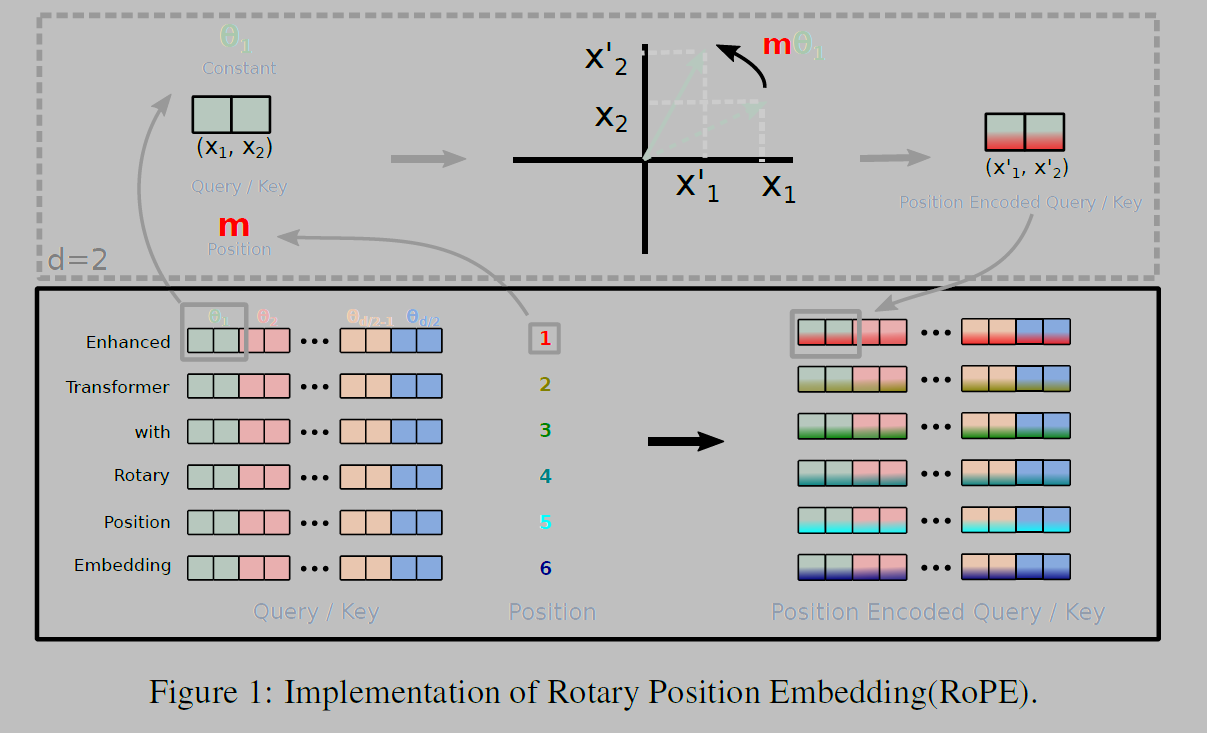

    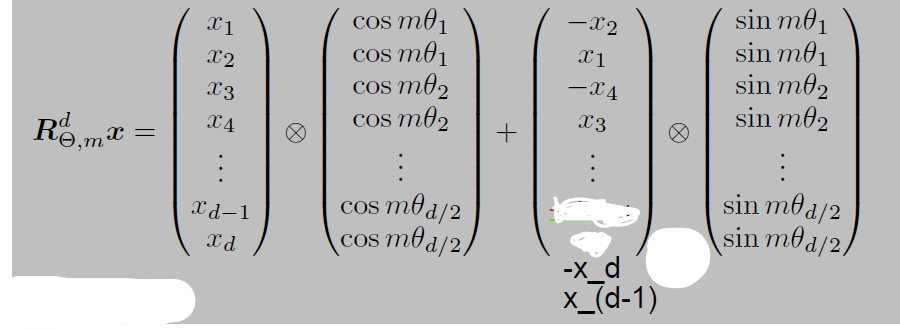

    [Implementaion reference](https://github.com/ZhuiyiTechnology/roformer/tree/main?tab=readme-ov-file#implementation)

# Mistral 7B
*